In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
#import seaborn as sns
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.applications import VGG19
from tensorflow.keras.applications import VGG19
pre_trained_model = tf.keras.applications.VGG19(input_shape=(224,224,3), include_top=False, weights="imagenet")
import cv2
import os
import numpy as np
import random
from tensorflow.keras.applications.vgg19 import VGG19, preprocess_input
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

2023-12-02 12:10:43.236034: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236148: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236230: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236308: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236390: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236601: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority unimplemented for this stream.
2023-12-02 12:10:43.236717: E ./tensorflow/compiler/xla/stream_executor/stream_executor_internal.h:124] SetPriority un

80134624/80134624 [==============================] - 1s 0us/step


In [ ]:
labels = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']
img_size = 224

def get_data(data_dir):
    data = []
    for label in labels:
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_COLOR)
                resized_arr = cv2.resize(img_arr, (img_size, img_size))  # Reshaping images to preferred size
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)

    # Separate features (X) and labels (y)
    X = np.array([item[0] for item in data])
    y = np.array([item[1] for item in data])

    return X, y

# Assuming you have a 'train' directory with subdirectories for each class
data_dir = "/kaggle/input/flower"
X, y = get_data(data_dir)

# Now, you can use X and y for further processing, e.g., model training


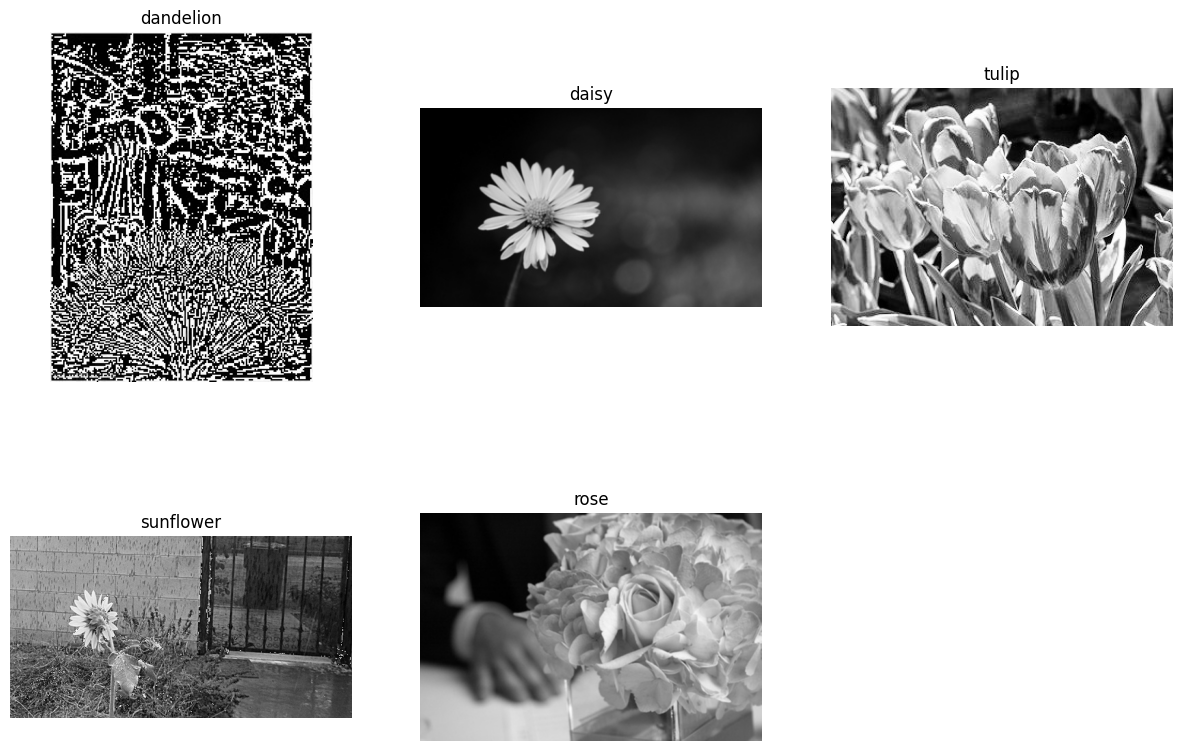

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to load and display images from each class
def display_images_from_each_class(data_dir, labels):
    plt.figure(figsize=(15, 10))

    for i, label in enumerate(labels):
        path = os.path.join(data_dir, label)
        img = cv2.imread(os.path.join(path, os.listdir(path)[0]))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.subplot(2, 3, i + 1)
        plt.imshow(img)
        plt.title(label)
        plt.axis('off')

    plt.show()

# Define the labels
labels = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']

# Assuming your dataset is in the "data_dir" directory
data_dir = "/kaggle/input/flower"

# Display images from each class
display_images_from_each_class(data_dir, labels)


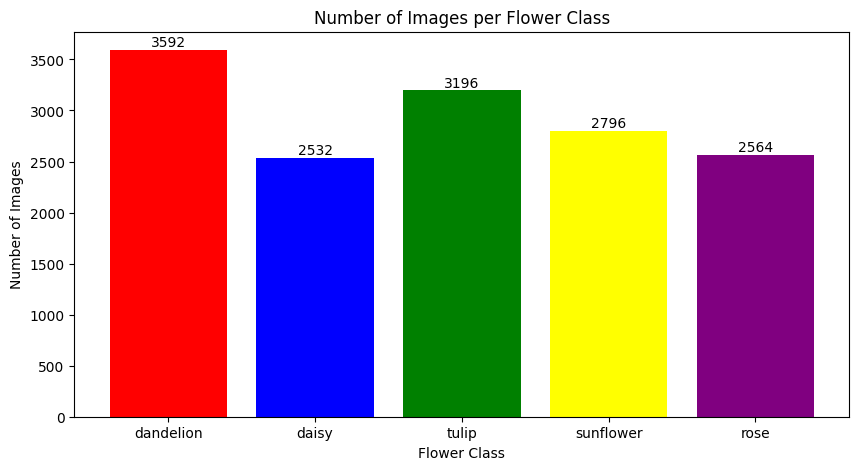

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

# Function to display the quantity of images for each class
def display_image_quantity_per_class(data_dir, labels):
    plt.figure(figsize=(10, 5))

    image_counts = []

    for label in labels:
        path = os.path.join(data_dir, label)
        image_count = len(os.listdir(path))
        image_counts.append(image_count)

    # Bar chart
    plt.bar(labels, image_counts, color=['red', 'blue', 'green', 'yellow', 'purple'])
    plt.xlabel('Flower Class')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Flower Class')

    # Display exact numbers on top of the bars
    for i, count in enumerate(image_counts):
        plt.text(i, count + 5, str(count), ha='center', va='bottom')

    plt.show()

# Define the labels
labels = ['dandelion', 'daisy', 'tulip', 'sunflower', 'rose']

# Assuming your dataset is in the "data_dir" directory
data_dir = "/kaggle/input/flower"

# Display the quantity of images for each class
display_image_quantity_per_class(data_dir, labels)


In [ ]:
# Preprocess the data
X = preprocess_input(X)

# Convert labels to one-hot encoding
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = to_categorical(y_encoded)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Create VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(label_encoder.classes_), activation='softmax'))  # Use len(label_encoder.classes_) for the number of classes


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/10
367/367 [==============================] - 372s 1s/step - loss: 2.5897 - accuracy: 0.5611 - val_loss: 0.8679 - val_accuracy: 0.6819
Epoch 2/10
367/367 [==============================] - 369s 1s/step - loss: 0.9971 - accuracy: 0.6419 - val_loss: 0.7953 - val_accuracy: 0.7309
Epoch 3/10
367/367 [==============================] - 366s 997ms/step - loss: 0.8404 - accuracy: 0.6783 - val_loss: 0.7093 - val_accuracy: 0.7687
Epoch 4/10
367/367 [==============================] - 367s 1s/step - loss: 0.7753 - accuracy: 0.7071 - val_loss: 0.5945 - val_accuracy: 0.7776
Epoch 5/10
367/367 [==============================] - 369s 1s/step - loss: 0.6978 - accuracy: 0.7335 - val_loss: 0.6696 - val_accuracy: 0.7824
Epoch 6/10
367/367 [==============================] - 367s 1s/step - loss: 0.6503 - accuracy: 0.7503 - val_loss: 0.5268 - val_accuracy: 0.8082
Epoch 7/10
367/367 [==============================] - 368s 1s/step - loss: 0.6255 - accuracy: 0.7631 - val_loss: 0.4876 - val_accuracy: 0.8

In [ ]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 5.3 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Make predictions using your trained model
predictions = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(predictions, axis=1)


92/92 [==============================] - 74s 797ms/step


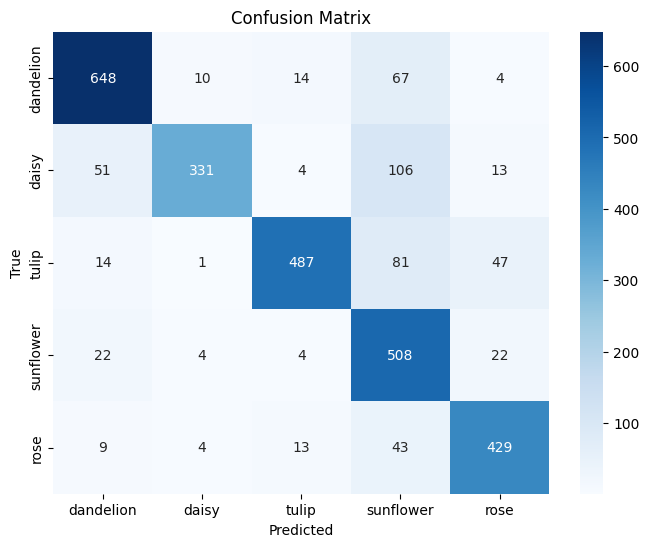

In [ ]:
# Generate confusion matrix
conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), y_pred_labels)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# Generate classification report
class_report = classification_report(np.argmax(y_test, axis=1), y_pred_labels, target_names=labels)

# Print classification report
print("Classification Report:")
print(class_report)


Classification Report:
              precision    recall  f1-score   support

   dandelion       0.87      0.87      0.87       743
       daisy       0.95      0.66      0.77       505
       tulip       0.93      0.77      0.85       630
   sunflower       0.63      0.91      0.74       560
        rose       0.83      0.86      0.85       498

    accuracy                           0.82      2936
   macro avg       0.84      0.81      0.82      2936
weighted avg       0.84      0.82      0.82      2936

